In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import matplotlib.dates as mdates
from time import strptime

In [3]:
RawData = pd.read_csv('Broadfields10minMet.dat.gz',na_values='-',compression = 'gzip')
RawData.dropna(axis=1,how='all',inplace=True)

In [4]:
RawData.loc[:,'Date'] = [datetime.datetime(RawData.loc[x,'Year'],
                 strptime(RawData.loc[x,'Month'],'%b').tm_mon,
                 RawData.loc[x,'Day'],
                 RawData.loc[x,'Hour'],
                 RawData.loc[x,'Min'],) for x in RawData.index]

In [5]:
RawData.set_index('Date',inplace=True)

In [6]:
RawData.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Min','MnDir(degT)', 
                      'StdDir(degT)', 'StdSpd(mps)', 'Pmsl(hPa)'],inplace=True)

In [7]:
RawData.columns = ['Windspeed','AirTemperature','RelativeHumidity','Rainfall','IncomingRadnMJ']

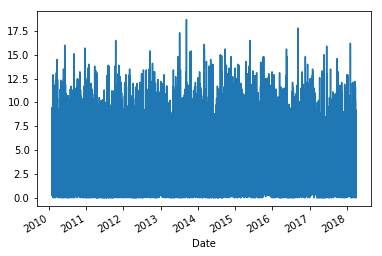

In [8]:
RawData.loc[:,'Windspeed'].plot()

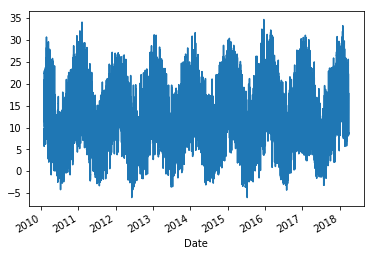

In [9]:
RawData.loc[:,'AirTemperature'].plot()

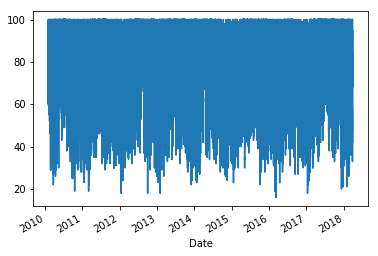

In [10]:
RawData.loc[:,'RelativeHumidity'].plot()

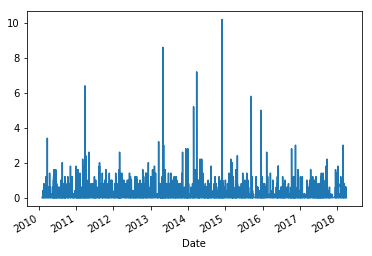

In [11]:
RawData.loc[:,'Rainfall'].plot()

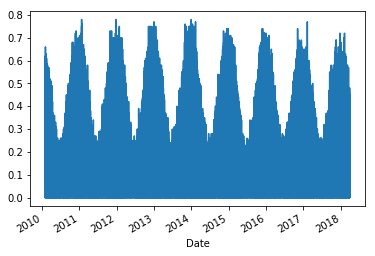

In [12]:
RawData.loc[:,'IncomingRadnMJ'].plot()

In [13]:
RawData.to_pickle('BroadFieldsMet.pkl')

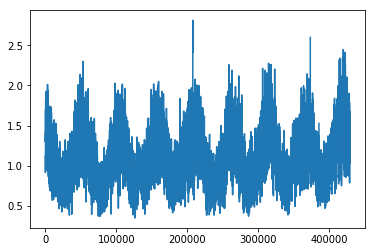

In [14]:
plt.plot([et.vp(RawData.loc[x,'AirTemperature'],
      RawData.loc[x,'RelativeHumidity']) for x in RawData.index])

In [15]:
Radn = RawData.loc[:,'IncomingRadnMJ'].resample('D').sum()
Temp = RawData.loc[:,'AirTemperature'].resample('D').mean()
Wind = RawData.loc[:,'Windspeed'].resample('D').mean()
Hum = RawData.loc[:,'RelativeHumidity'].resample('D').mean()
PET = pd.DataFrame(index = Radn.index, columns = ['PET'],
                   data = [et.PenmanEO(Radn[x],
                            Temp[x],
                            Wind[x],
                            et.vp(Temp[x],Hum[x]),
                            "total") for x in Radn.index])

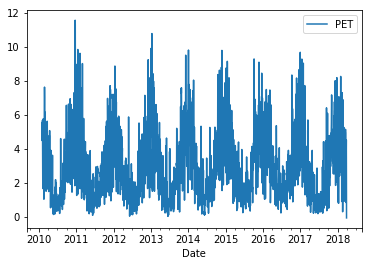

In [16]:
PET.plot()

## Bring in MeanData and use to plug gaps

In [28]:
MeanPET = pd.read_pickle('../2020/Weather/MeanPET.pkl')

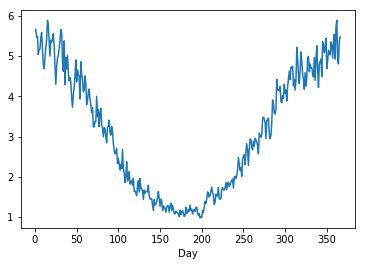

In [29]:
MeanPET.plot()

In [36]:
PET.index[300].dayofyear

332

In [39]:
for x in PET.index:
    if math.isnan(PET.PET[x]) == True:
        PET.PET[x] = MeanPET[x.dayofyear]

In [41]:
PET.to_pickle('BroadFieldsPET.pkl')